<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6403 entries, 0 to 6402
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N_id             6403 non-null   int64  
 1   Title            6403 non-null   object 
 2   Main Genre       6403 non-null   object 
 3   Sub Genres       6403 non-null   object 
 4   Release Year     6402 non-null   float64
 5   Maturity Rating  6403 non-null   object 
 6   Original Audio   3767 non-null   object 
 7   Recommendations  6392 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 400.3+ KB
     N_id                           Title Main Genre  \
0  215309      Ace Ventura: Pet Detective     Comedy   
1  215318  Ace Ventura: When Nature Calls     Comedy   
2  217258               The Addams Family     Comedy   
3  217303            Addams Family Values     Comedy   
4  235527                       Agneepath      Drama   

                                S

/var/folders/7m/z6nngysn0_7d39pvcgvhlbt40000gn/T/ipykernel_19634/3720332697.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


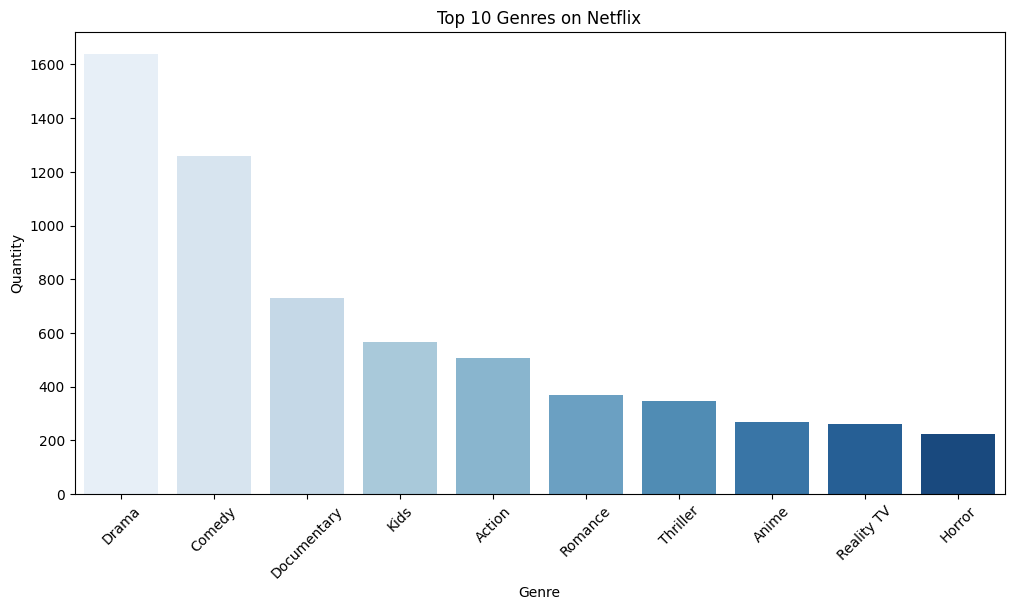

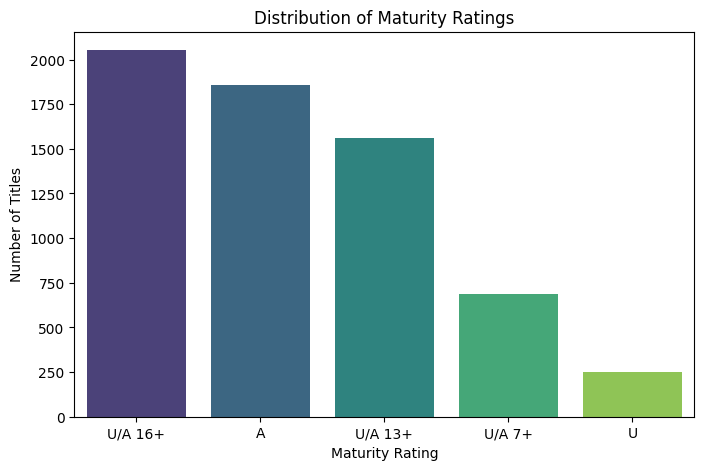

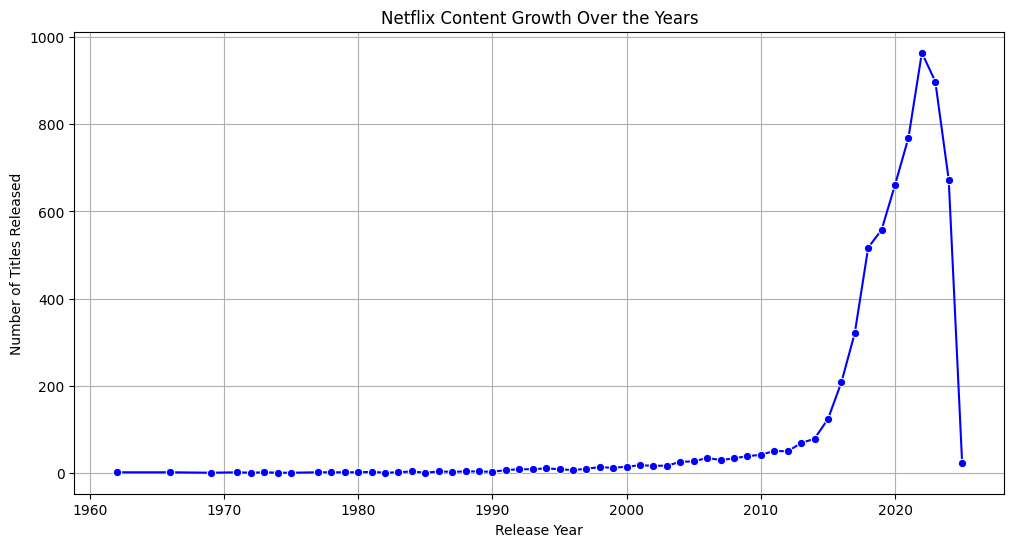

Data Analysis Completed Successfully!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Netflix Data new.csv")

df = df.copy()

df.info()
print(df.head())

df['Release Year'] = df['Release Year'].fillna(df['Release Year'].mode()[0])
df['Original Audio'] = df['Original Audio'].fillna('Unknown')
df['Recommendations'] = df['Recommendations'].fillna('')

print(df.describe())

df['Recommendations Count'] = df['Recommendations'].apply(lambda x: len(x.split(',')) if x else 0)

#unique genres
print("Unique Genres:", df['Main Genre'].nunique())

#most common genres
print(df['Main Genre'].value_counts().head(10))

print(df['Release Year'].value_counts().sort_index())

#most frequent maturity ratings
print(df['Maturity Rating'].value_counts())

#multiple sub-genres
df['Sub Genres Count'] = df['Sub Genres'].apply(lambda x: len(x.split(',')))
print("Titles with multiple sub-genres:", df[df['Sub Genres Count'] > 1].shape[0])

#most common audio languages
print(df['Original Audio'].value_counts().head(10))

#movies with highest recommendations
print(df.nlargest(10, 'Recommendations Count')[['Title', 'Recommendations Count']])

#movies with zero recommendations
print("Titles with zero recommendations:", df[df['Recommendations Count'] == 0].shape[0])

#year with the most content releases
print("Year with most releases:", df['Release Year'].value_counts().idxmax())

#most common genre in last 5 years
print(df[df['Release Year'] >= 2018]['Main Genre'].value_counts().head(5))

#visualising top genres
plt.figure(figsize=(12,6))
sns.barplot(
    x=df['Main Genre'].value_counts().index[:10], 
    y=df['Main Genre'].value_counts().values[:10], 
    palette='Blues'
)
plt.xticks(rotation=45)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.show()

#visualising maturity rating
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df['Maturity Rating'].value_counts().reset_index(), 
    x='index', 
    y='Maturity Rating'
)
plt.title("Distribution of Maturity Ratings")
plt.xlabel("Maturity Rating")
plt.ylabel("Number of Titles")
plt.show()

#visualising content growth
titles_per_year = df['Release Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker="o", color="blue")
plt.title("Netflix Content Growth Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(True)
plt.show()

print("Data Analysis Completed Successfully!")
